# Tabular Playground Series

* This is Kaggle's first ever unsupervised clustering challenge!
* In this challenge, they have given a dataset where each row belongs to a particular cluster. 
* Our job is to predict the cluster each row belongs to and you are not told how many clusters are found in the ground truth labels.

### First we are going to Import required libraries for our model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Now lets Import dataset

In [2]:
data = pd.read_csv('data.csv')  # Data is stored in a Variable 'data'

In [3]:
data.head()       # get 5 entries from Top

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [4]:
data.drop(['id'], axis=1, inplace = True)    # Lets drop 'id' column which is irrelevent 

### Now, Lets see what are the column Names that we have

In [5]:
data.columns            # these are the column names that we have in the dataset

Index(['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08',
       'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17',
       'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26',
       'f_27', 'f_28'],
      dtype='object')

In [6]:
data.info()      # get the information about the dataset, no of rows & their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22

* There are 29 features
* There are 98,000 data points
* There are 7 discrete features (f_07 to f_13) and other are continuous.

### Now, lets check null value present in our Dataset

In [7]:
data.isnull().sum()

f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

There is no null values present in our dataset

In [8]:
print('duplicat values:', data.duplicated().sum())

duplicat values: 0


There is no Duplicate values present in the Dataset

In [9]:
data.describe()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,8.193163,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,5.904919,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,7.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,11.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,44.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


### EDA of the column

Text(0.5, 1.0, 'Histograms of Columns')

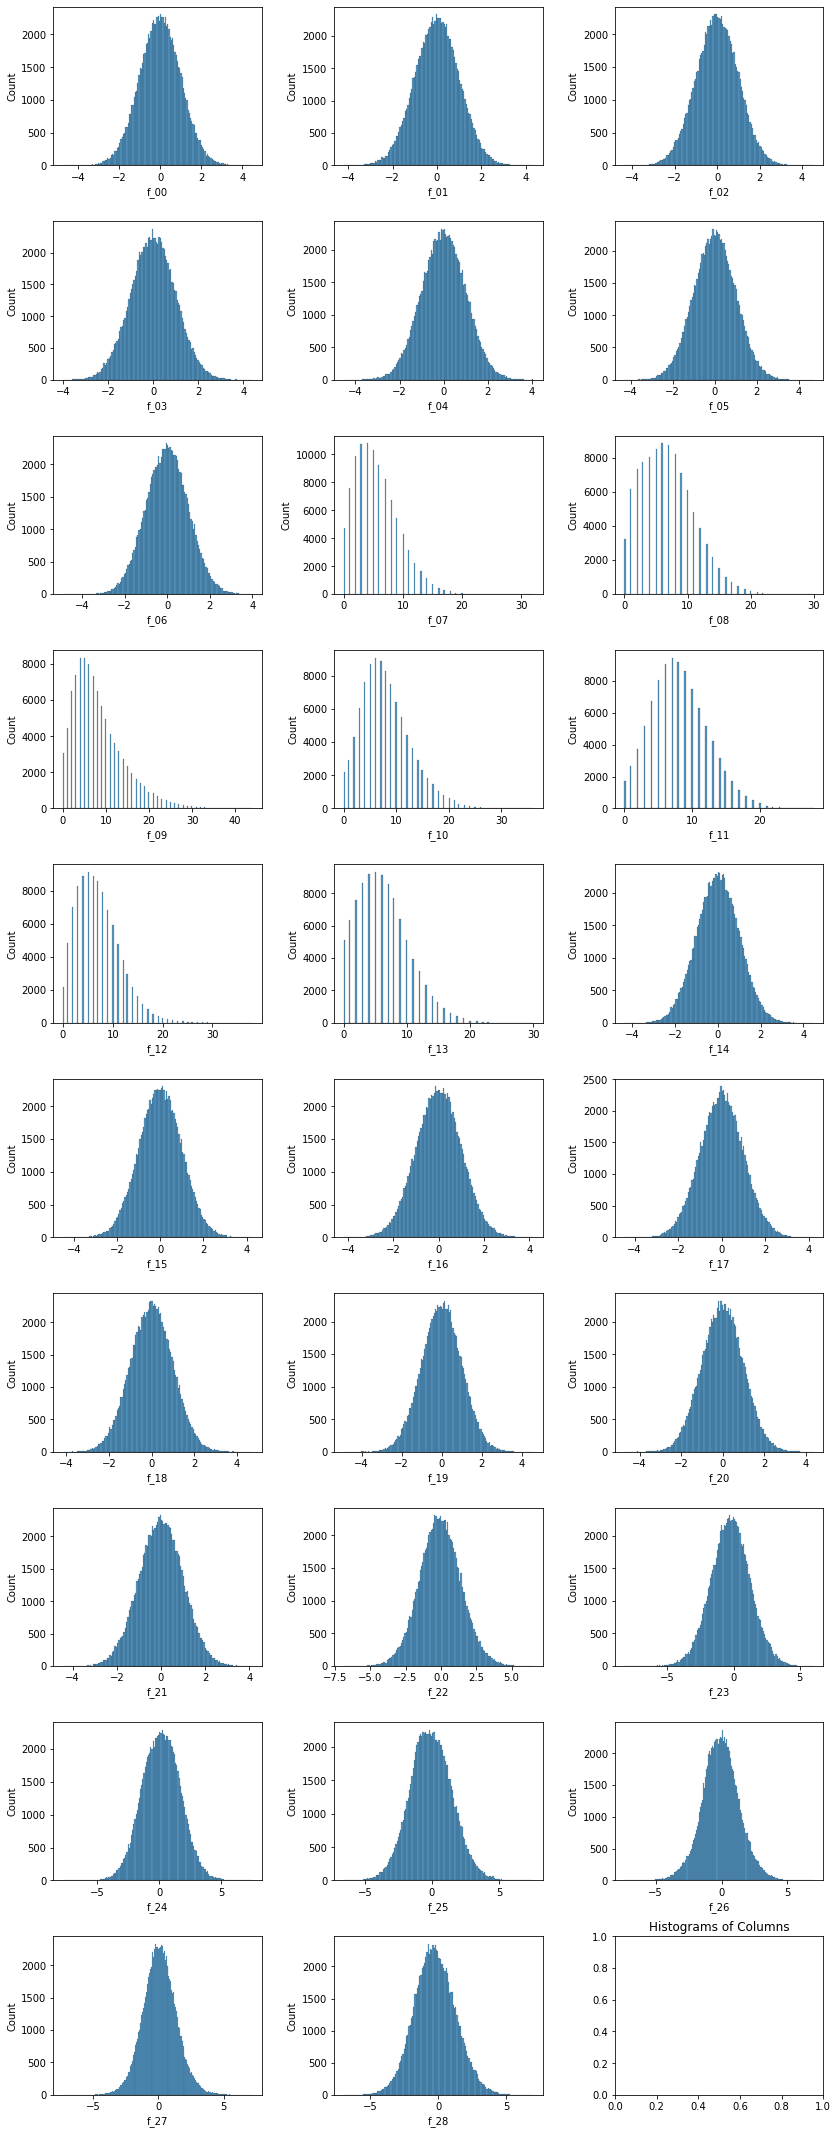

In [10]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(12, 30))
axes = axes.reshape(-1)

continuous = [col for col in data.columns if data[col].dtype != object]
for i, col in enumerate(continuous):
    sns.histplot(data[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.title('Histograms of Columns')

* Discrete features are positive skew and have similar distributions
* Continous features are normally distributed

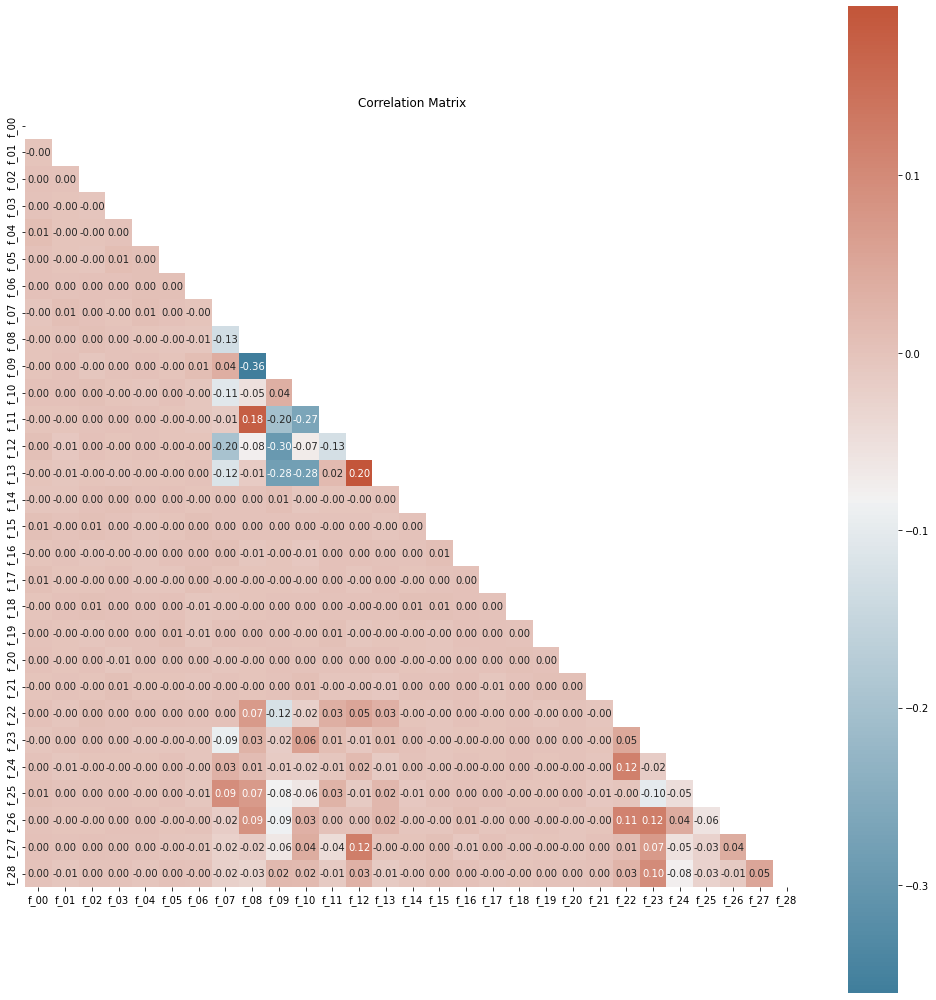

In [11]:
plt.figure(figsize=(14, 14))
plt.title('Correlation Matrix')

# Creating a mask to block the top right half of the heatmap (redundant information)
mask = np.triu(np.ones_like(data.corr()))

# Custom color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.tight_layout()

### Modelling

In [12]:
from sklearn.preprocessing import RobustScaler, PowerTransformer, StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.metrics import silhouette_score

In [13]:
scaled_data = pd.DataFrame(PowerTransformer().fit_transform(data))

scaled_data.columns = data.columns

### Elbow method

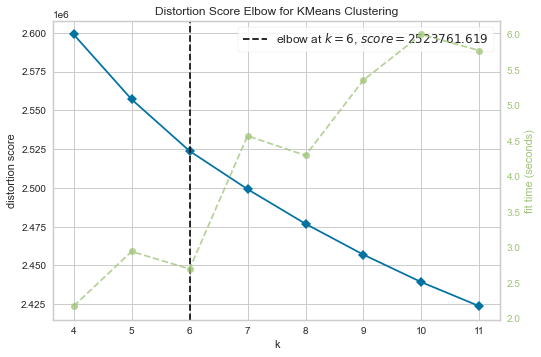

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
elbow_m = KElbowVisualizer(KMeans(random_state=23), k=(4, 12))

elbow_m.fit(scaled_data)

elbow_m.show()

In [15]:
BEST_CLUSTER_NUM = 6

In [16]:
model_bgm = BayesianGaussianMixture(n_components=BEST_CLUSTER_NUM)
preds = model_bgm.fit_predict(scaled_data)

In [17]:
silhouette_score(scaled_data, preds)

0.017200335271314527

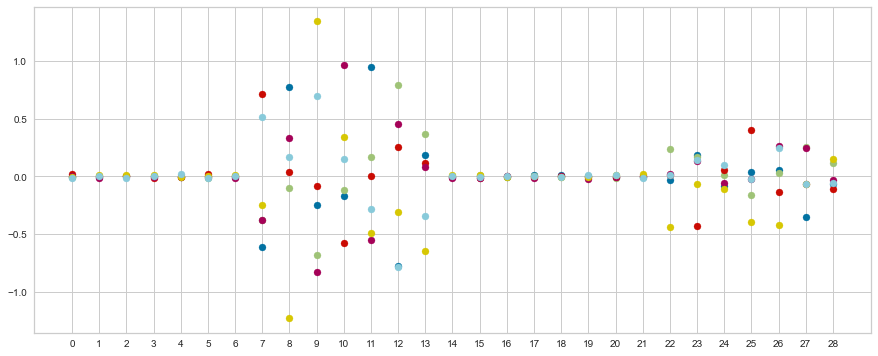

In [18]:
plt.figure(figsize=(15,6))
for i in range(model_bgm.means_.shape[0]):
    plt.scatter(np.arange(scaled_data.shape[1]), model_bgm.means_[i])
plt.xticks(ticks=np.arange(scaled_data.shape[1]), label=scaled_data.columns)
plt.show()

### From the above figure, we can see that the f_00 to f_06 and f_14 to f_21 are not much useful. They don't separate the cluster at all. So, we can drop these.

In [19]:
features = ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']

scaled_data_crop = scaled_data[features]

In [20]:
bgm_preds = model_bgm.fit_predict(scaled_data_crop)

silhouette_score(scaled_data_crop, bgm_preds)

0.040775828868761396

In [21]:
model_gm = GaussianMixture(n_components=BEST_CLUSTER_NUM)

gm_preds = model_gm.fit_predict(scaled_data_crop)

silhouette_score(scaled_data_crop, gm_preds)

0.04062286135659118

In [22]:
model_km = KMeans(n_clusters=BEST_CLUSTER_NUM)

km_preds = model_km.fit_predict(scaled_data_crop)

silhouette_score(scaled_data_crop, km_preds)

0.07475759773779515

It seems better than previous score

In [23]:
# K-mean produces higher scores compared to others

In [25]:
final_preds = km_preds

Text(0.5, 1.0, 'predicted clusters')

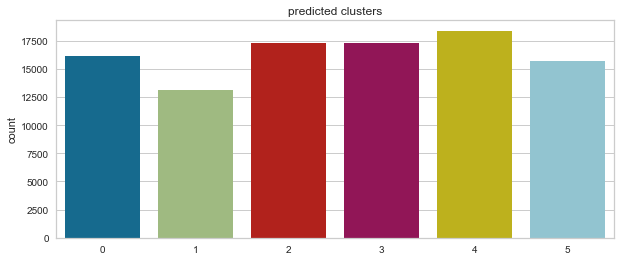

In [26]:
plt.figure(figsize=(10,4))

sns.countplot(x=final_preds)

plt.title('predicted clusters')

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

submit['Predicted'] = final_preds

submit.to_csv('submission.csv', index=False)